Ningbo University of Technology - Computer Vision 

姓名：李家东

学号：20401240118

班级：AI201

日期：2023/4/26

# 实验1: 图像处理

### 实验目的：
（1）掌握图像对比度、熵的概念及计算方法；

（2）掌握图像直方图均衡化算法，并能运用其进行图像增强。

## 任务 1: 对比度、直方图均衡化与信息熵的概念 [20分]

### a) 图像对比度

用自己的语言给出图像全局对比度、局部对比度的概念. 引起低对比度的原因是什么? 如何改善图像的对比度?

你的回答：</p>
- 图像全局对比度

    图像全局对比度是指图像中最亮和最暗像素之间的亮度差异的度量。一个具有高对比度的图像，最亮和最暗像素之间的差异很大，而一个具有低对比度的图像，最亮和最暗像素之间的差异则很小。

- 图像局部对比度

    图像局部对比度是指图像中区域之间的亮度差异程度。其中局部对比度可以描述图像中不同区域的细节和纹理的变化。

- 引起低对比度的原因

  1) 照明不足：如果图像的拍摄环境昏暗，图像的对比度会降低。
   
  2) 过曝或欠曝：如果图像被过度曝光或欠曝光，图像中的细节和色彩会丧失，从而导致低对比度。
   
  3) 相机设置不当：如果相机的对比度设置不当，也会导致低对比度的图像。
   
  4) 拍摄位置不当：如果拍摄角度或位置不当，也可能导致图像的对比度降低。
   
  5) 图像处理不当：在对图像进行处理时，如果处理不当，也可能导致图像的对比度降低。

- 改善图像对比度的方法

  1) 调整图像的亮度和对比度：通过调整图像的亮度和对比度，可以增强图像中明暗度的差异，从而提高图像的对比度。
   
  2) 应用直方图均衡化：直方图均衡化是一种用于增强图像对比度的常见方法。
   
  3) 应用局部对比度增强算法：局部对比度增强算法可以通过对图像的不同区域进行局部对比度增强来提高图像的对比度。
   
  4) 使用滤镜：一些滤镜可以用于增强图像的对比度，如锐化滤镜、增强对比度滤镜等。
   
  5) 重新拍摄或重新扫描图像：如果图像的对比度太低，也可以考虑重新拍摄或重新扫描图像。

### b) 直方图均衡化与熵

直方图均衡化的原理是什么? 什么是熵，熵与直方图均衡化之间存在什么关系? 

你的回答：</p>
- 直方图均衡化的原理

    直方图均衡化是一种用于增强图像对比度的常见方法，它通过对图像像素的直方图进行变换，使得图像的灰度级分布更均匀，从而提高图像的对比度。

- 熵

    熵是信息论中的一个概念，它是用来衡量信息量的一种指标，表示信息的随机性或不确定性程度。
    
- 熵与直方图均衡化之间的关系

    直方图均衡化是一种用于增强图像对比度的方法，可以通过调整图像的灰度级分布来增强图像的对比度。而在直方图均衡化中，熵被用来衡量图像的灰度级分布的均匀性，从而决定如何进行直方图均衡化的操作。具体来说，直方图均衡化可以通过将图像像素的灰度级映射到一个均匀分布的灰度级范围来增强图像的对比度。在进行直方图均衡化时，可以根据图像像素的灰度级分布的熵来确定如何进行灰度级映射的操作，以达到最优的增强效果。如果图像的灰度级分布越均匀，其熵也会越大，反之则越小。

## 任务 2: 计算图像对比度与熵 [40分]


补充下面函数代码，实现计算图像全局对比度、局部对比度和信息熵的功能

d:\Anaconda3\envs\PyTorch\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


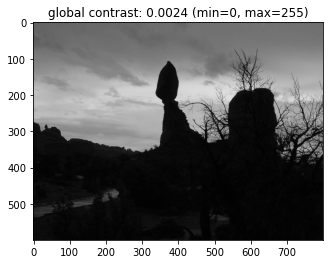

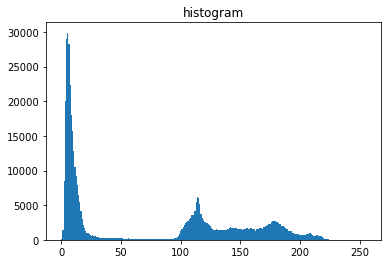

In [2]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

def global_contrast(img, value_range=None):
    """
    Compute the global contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
        value_range (tuple): The minimum and maximum values of the gray scale.
    
    Returns:
        contrast (float): The global contrast of the image. 
    """

    # determine range: simplified, just checks for uint8 
    if value_range is None:
        value_range = (0, 255) if img.dtype == np.uint8 else (0., 1.)

    # YOUR CODE HERE
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    cumulative_hist = hist.cumsum()
    norm_cumulative_hist = cumulative_hist * hist.max() / cumulative_hist.max()
    mean_value = np.mean(img)
    contrast = np.sqrt(np.mean((img - mean_value) ** 2))
    contrast_normalized = contrast / (norm_cumulative_hist.max() - norm_cumulative_hist.min())
    return contrast_normalized
    

img = imread('./dark.png')
plt.title("global contrast: {:.4f} (min={}, max={})".format(global_contrast(img), img.min(), img.max()))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.title('histogram')
plt.show()

d:\Anaconda3\envs\PyTorch\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


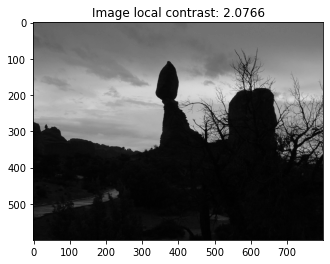

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from scipy.ndimage.filters import uniform_filter

def local_contrast(img, window_size=5):
    """
    Compute the local contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
    
    Returns:
        contrast (float): The local contrast of the image. 
    """

    # YOUR CODE HERE
    # 将图像转换为灰度图
    gray_image = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
    # 计算局部均值
    local_mean = uniform_filter(gray_image, size=window_size)
    # 计算局部方差
    local_variance = uniform_filter(gray_image ** 2, size=window_size) - local_mean ** 2
    # 计算局部标准差（局部对比度）
    local_contrast = np.sqrt(local_variance)
    # 计算整体局部对比度
    overall_contrast = np.mean(local_contrast)
    return overall_contrast
    

img = imread('dark.png')
plt.title("Image local contrast: {:.4f}".format(local_contrast(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

d:\Anaconda3\envs\PyTorch\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


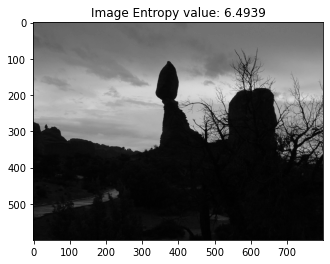

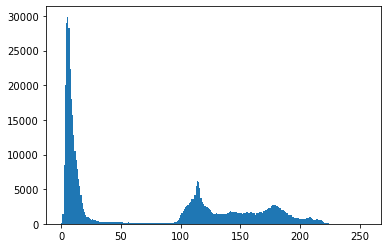

In [6]:
from imageio import imread
import math
import numpy as np
%matplotlib inline


def entropy(img):
    """
    Compute the entropy for a given image.
    Args:
        img (ndarray): The grayscale image to compute the entropy for.

    Returns:
        img_entropy (float): The entropy of the image. 
    """
    # YOUR CODE HERE
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    hist = hist.astype('float') / hist.sum()
    hist[hist == 0] = 1
    entropy = -np.sum(hist * np.log2(hist))
    return entropy

img = imread('dark.png')
plt.title("Image Entropy value: {:.4f}".format(entropy(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()


## 任务 3: 自适应直方图均衡化 [40分]

参考论文“Contrast Limited Adaptive Histogram Equalization”

### a) Adaptive Histogram Equalization (AHE)

用自己的语言简述AHE的原理. 为什么引入AHE，其主要缺点是什么?

你的回答：</p>
- AHE的原理

    AHE（Adaptive Histogram Equalization）是一种自适应直方图均衡化方法，用于增强图像对比度。它的基本原理是将图像分成多个不重叠的小块，然后在每个小块内进行直方图均衡化。在进行直方图均衡化时，不同小块之间的灰度级映射不同，因此能够根据图像的局部特征来进行自适应的均衡化操作。

- 引入AHE的原因

    传统的全局直方图均衡化方法在图像增强中存在一些问题。全局直方图均衡化方法是将整张图像的灰度级分布进行均衡化，虽然能够增强图像的对比度，但同时也会导致图像出现过度增强、失真和噪声等问题。AHE能够有效地增强图像的对比度，并保留图像的细节信息，避免了全局均衡化方法可能出现的过度增强和噪声增加等问题。

- AHE的缺点

  1) 对图像噪声敏感：由于AHE是根据每个小块的灰度级分布进行直方图均衡化，因此在图像存在噪声的情况下，AHE容易出现局部均衡化效果不佳的情况。
   
  2) 计算量大：AHE需要将图像分成多个不重叠的小块，并对每个小块进行直方图均衡化，因此计算量比较大，对于大型图像和实时图像处理场景不太适用。
   
  3) 伪影效应：AHE可能会导致图像出现伪影效应，即增强后的图像出现灰度级不连续的情况，导致图像细节损失。
   
  4) 亮度失真：AHE会将亮度变化较大的图像块进行均衡化，但是在图像亮度变化不明显的区域，AHE可能会将图像变得过于明亮或者过于暗淡，导致亮度失真。


### b) Contrast Limited Adaptive Histogram Equalization (CLAHE)

用自己的语言简述CLAHE的原理. 为什么引入CLAHE? 

你的回答：</p>
- CLAHE的原理

    CLAHE（Contrast Limited Adaptive Histogram Equalization）是一种改进的自适应直方图均衡化方法，它能够在保留图像细节信息的同时，控制局部均衡化的对比度增强程度。首先它将图像分成大小相等的小块，计算局部直方图并进行直方图均衡化，为了控制局部均衡化的对比度增强程度，CLAHE引入了一个限制因子，以此限制对比度增强，最后合并小块。

- 引入CLAHE的原因

    虽然AHE在图像增强方面具有很好的效果，但是它也存在一些缺点，如对噪声敏感、计算量大、伪影效应和亮度失真等。为了克服AHE的这些缺点，CLAHE被引入，主要是为了解决控制局部均衡化的对比度增强程度和改善算法的实用性和计算效率。

### c) AHE和CLAHE的应用

在模块 `skimage.exposure`中查找计算HE和CLAHE的函数， 并将他们用于图像 `nbut.jpg`. 比较两种均衡化的效果.

d:\Anaconda3\envs\PyTorch\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


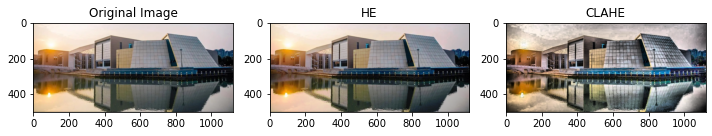

In [7]:
%matplotlib inline
# YOUR CODE HERE
import matplotlib.pyplot as plt
from skimage import io, exposure

# 读取图像
image = io.imread('nbut.jpg')

# 计算直方图均衡化（HE算法）
he_image = exposure.equalize_hist(image)

# 计算对比度受限自适应直方图均衡化（CLAHE算法）
clahe_image = exposure.equalize_adapthist(image, clip_limit=0.03)

# 显示原图、HE、CLAHE
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
ax = axs.ravel()

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(he_image, cmap='gray')
axs[1].set_title('HE')

axs[2].imshow(clahe_image, cmap='gray')
axs[2].set_title('CLAHE')

plt.tight_layout()
plt.show()